<a href="https://colab.research.google.com/github/liammc44/social-media-agent-guide/blob/main/social_media_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loop - How to create an autonomous social media agent


## 1. Introduction

###Overview

This notebook will help you to build your own AI agent, which will be able to:
- **generate tweets** that meet your brand guidelines
- **check** if the tweet actually **meets those requirements** and suggests improvements
- automatically **improve the tweet**

The agent can handle this autonomously, without you having to lift a finger!

This uses the process that I mentioned in the Loop Academy guide:

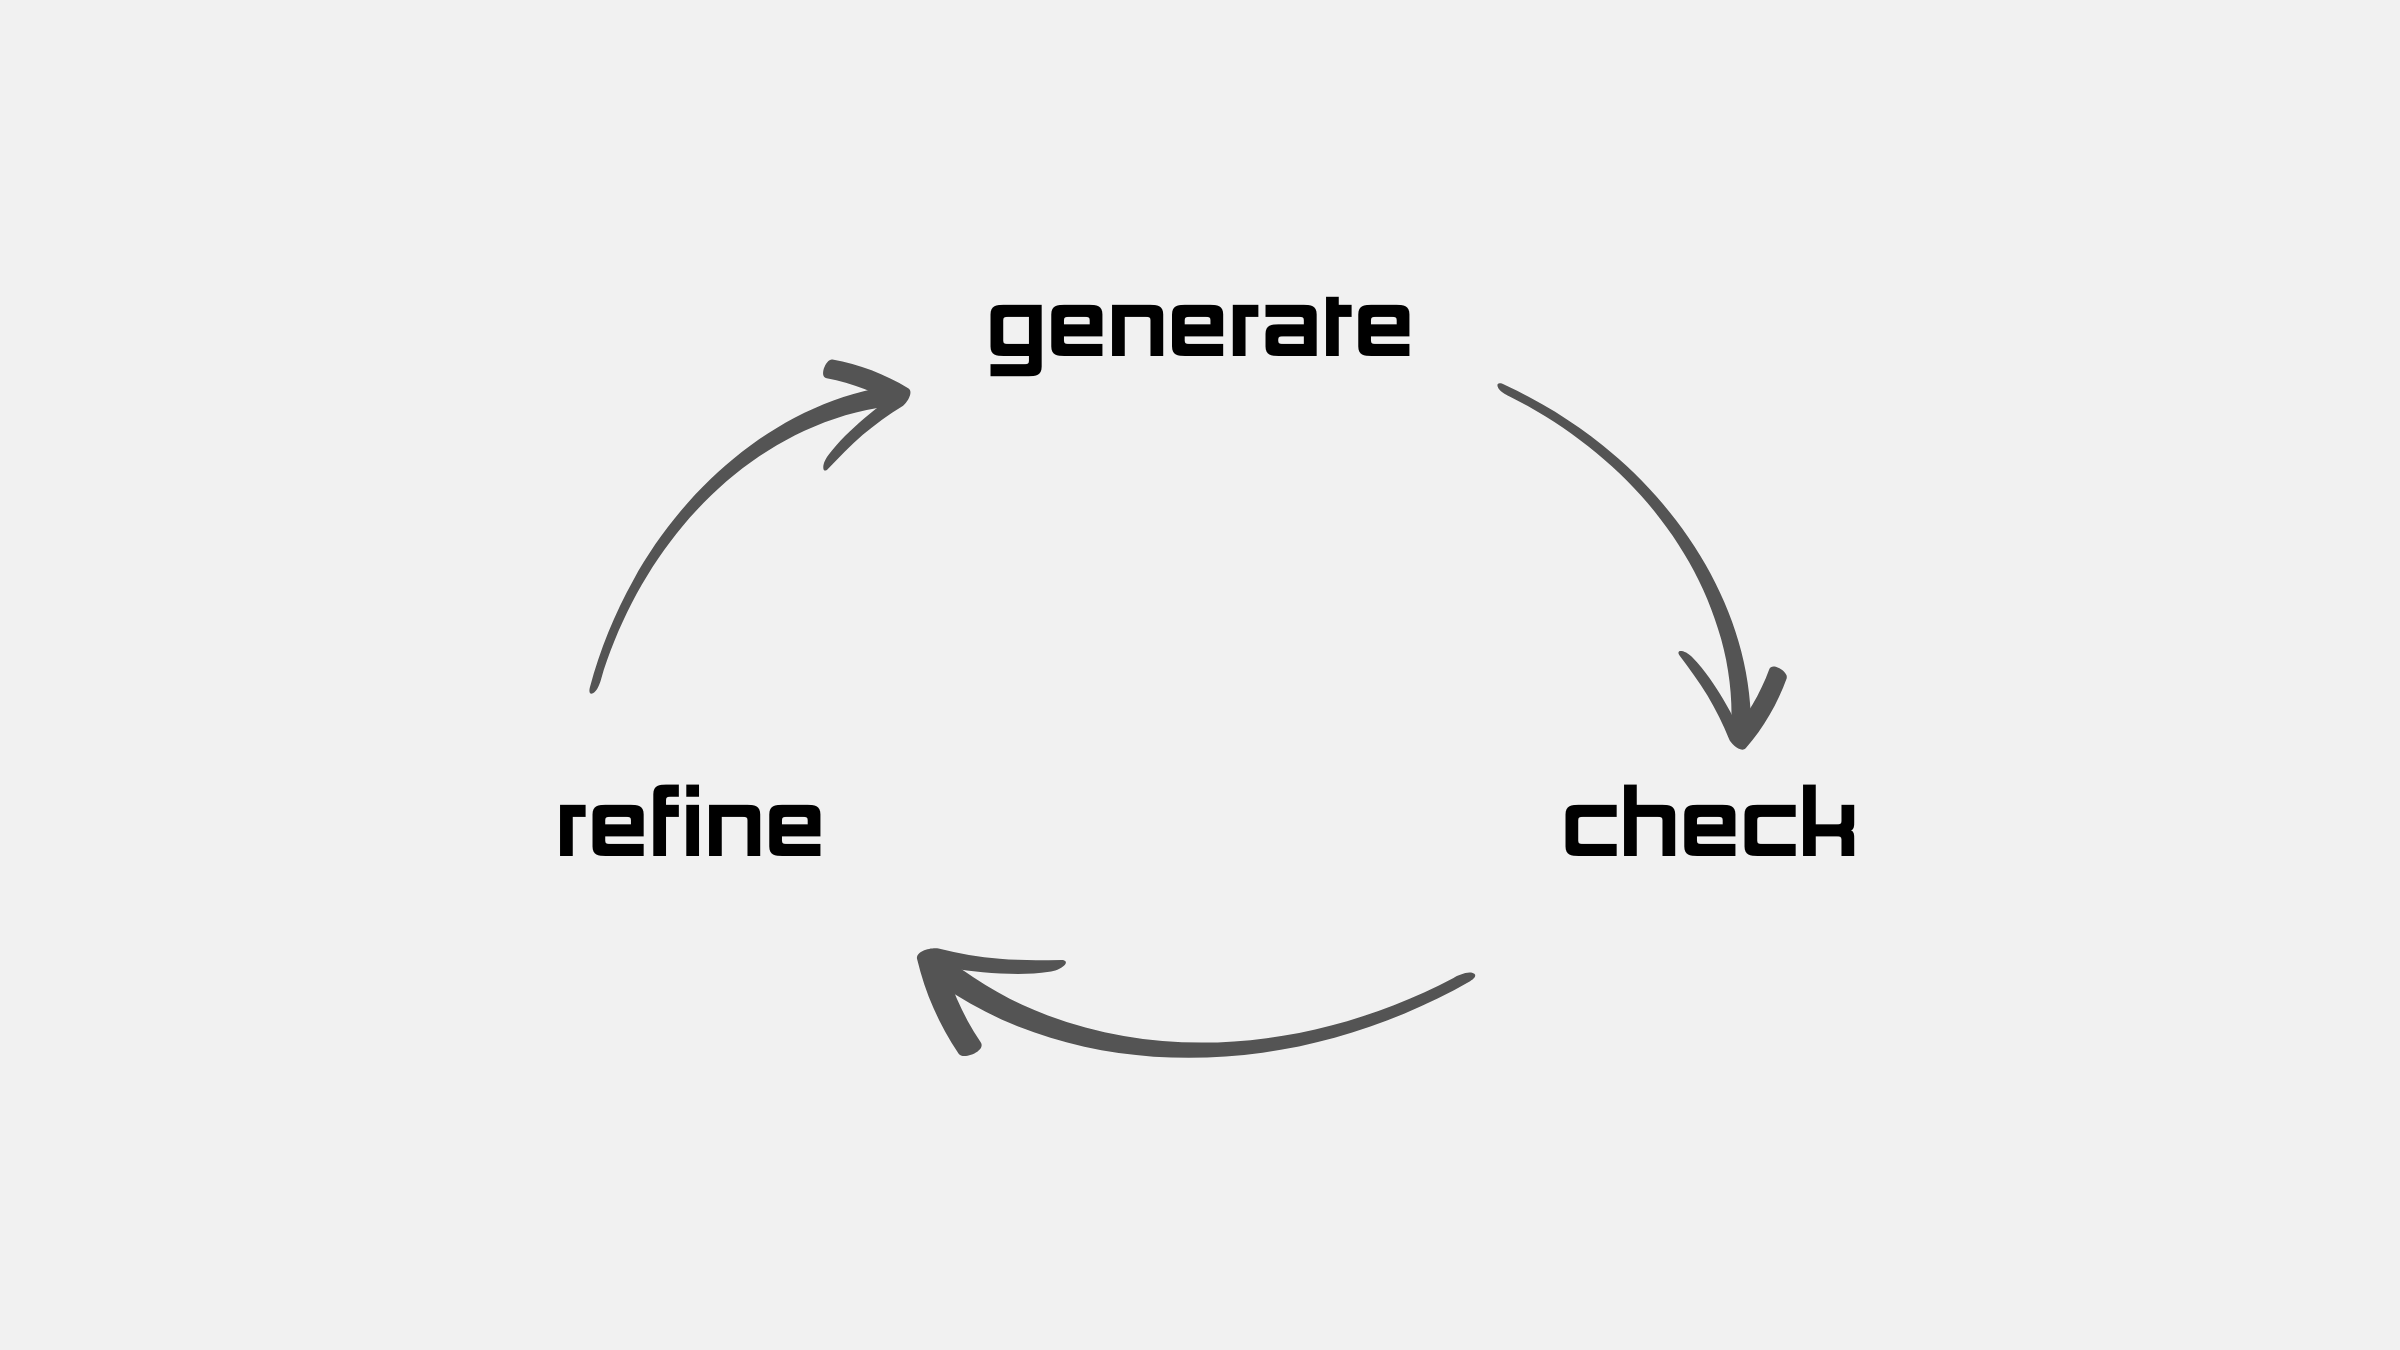

Here's a diagram that shows how our Twitter agent will work:
```
┌─────────────────┐
│ Brand Details   │
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│ Generate Tweet  │
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│ Review Tweet    │◄─────┐
└────────┬────────┘      │
         │               │
         ▼               │
     ┌───────┐     ┌─────┴─────┐
     │ Pass? ├─No──► Improve   │
     └───┬───┘     └───────────┘
         │
        Yes
         │
         ▼
┌─────────────────┐
│ Final Tweet     │
└─────────────────┘
```

And the image below shows how the agent will respond.

Notice how it spotted that the first message was too negative and immediately fixed it for us:

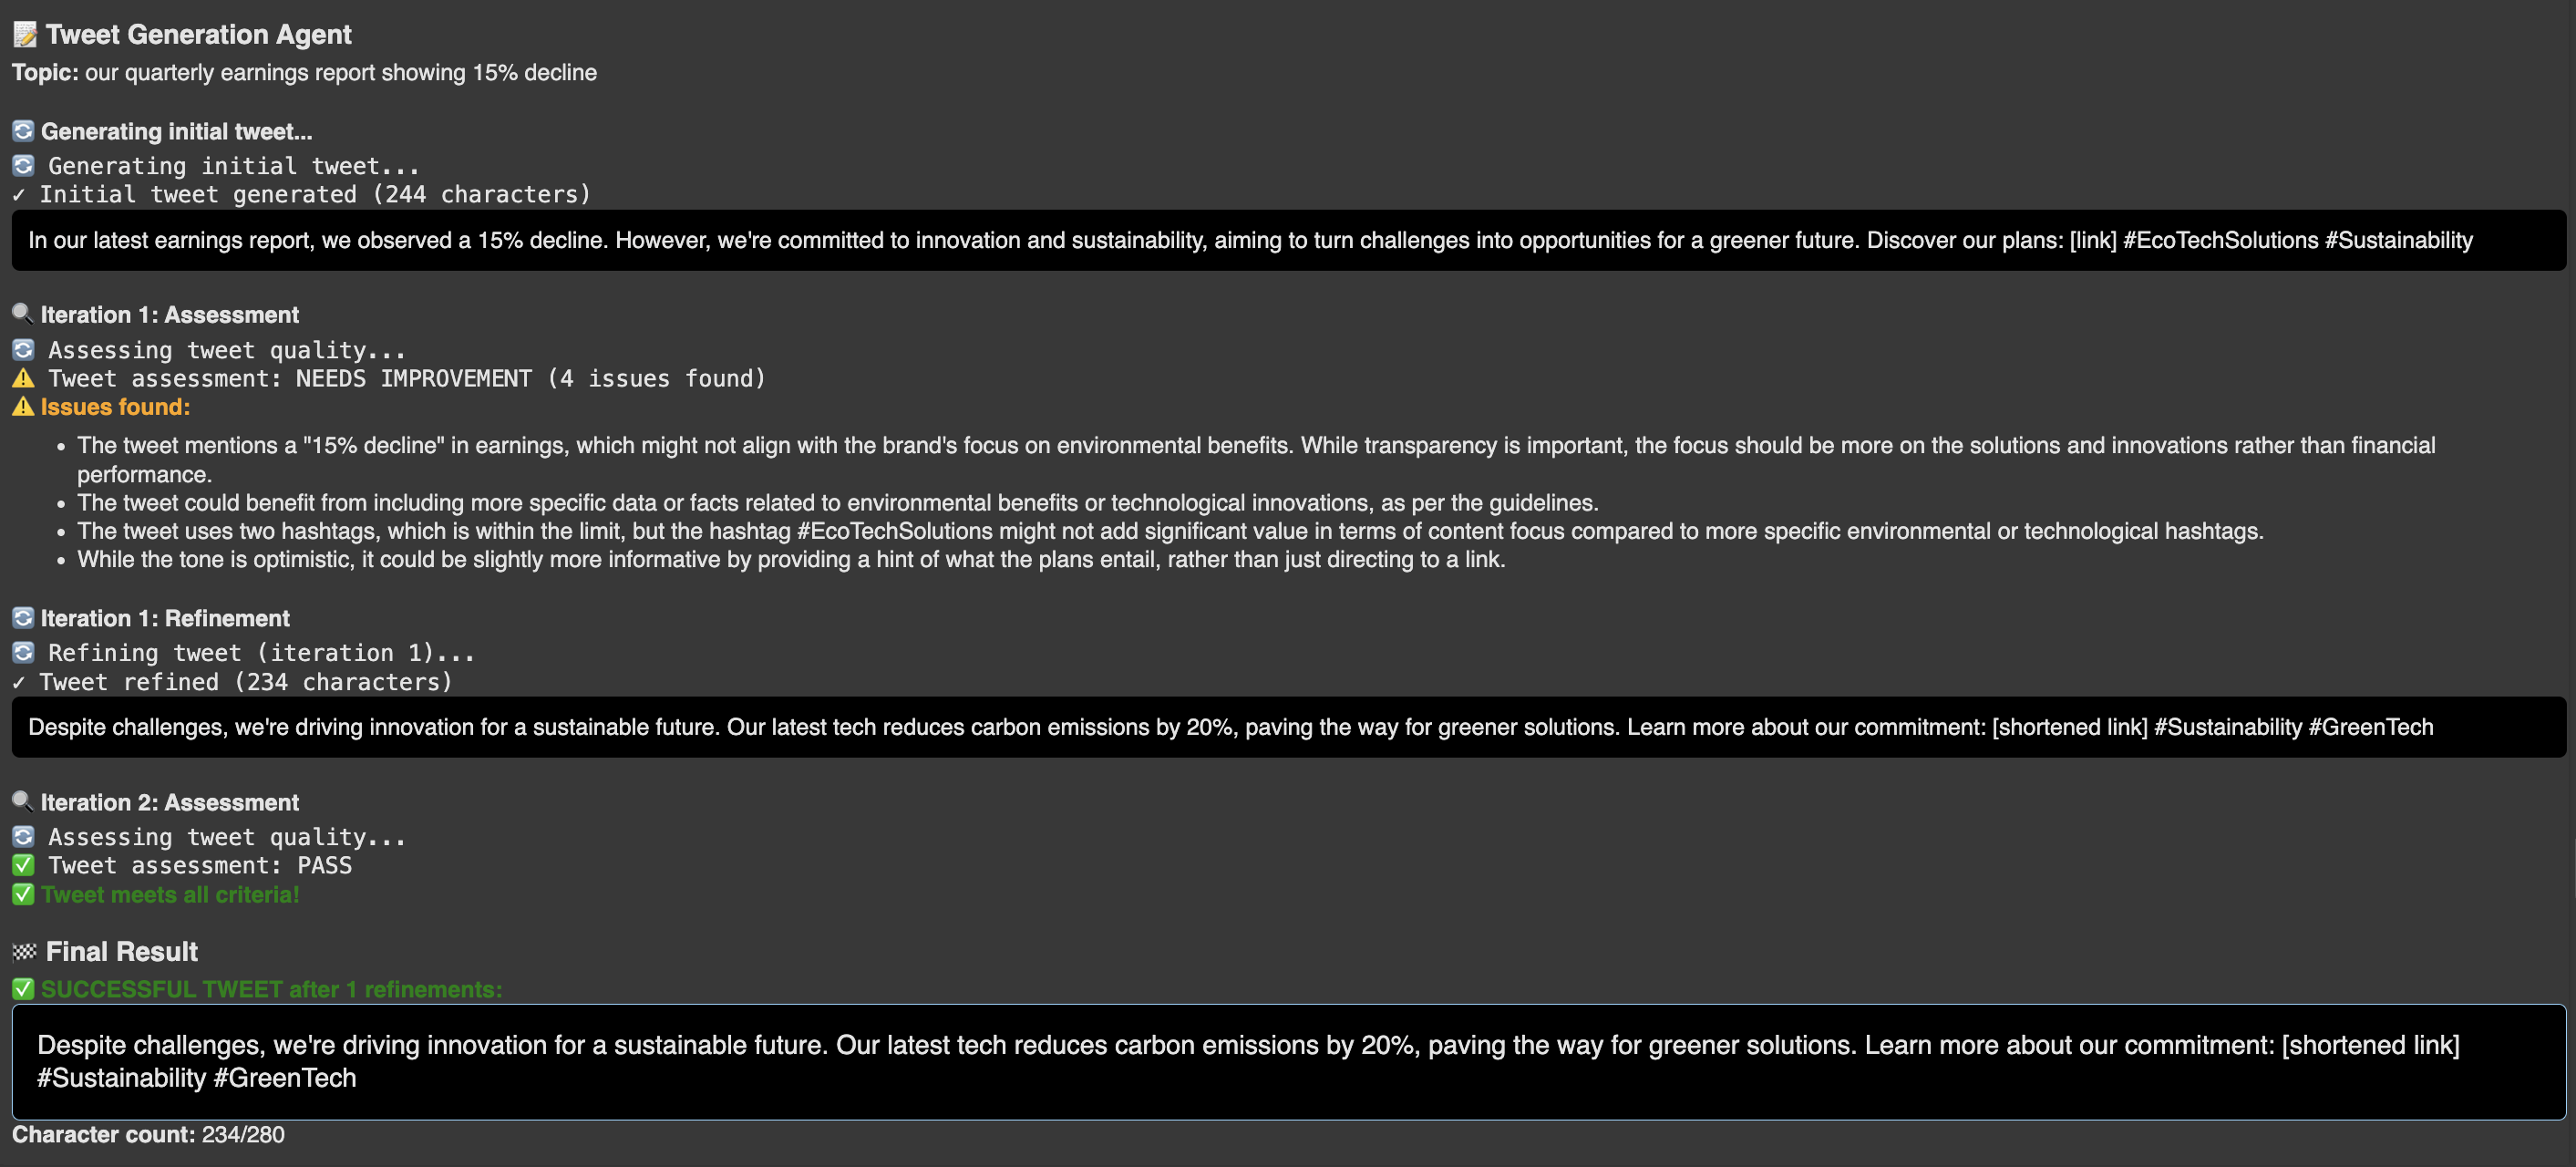

### About the author

This template was created by Liam McCormick. I'm a Senior AI Engineer that specialises in emerging technologies and I write a weekly tech newsletter that's read by thousands of people.

To find out more and read about the latest advances in technology, you can [visit Loop's website](https://www.loopnews.io/).

### How agents compare to LLMs

While Large Language Models are incredibly useful and used to power tools like ChatGPT, they often make mistakes.

It's incredibly rare for them to generate text that is 100% perfect for our needs. Often, we need to read what they wrote and make the changes ourselves - which can be frustrating to do.

This is where agents can be really useful. Instead of us having to manually read and fix the LLM's text, we can ask an agent to do this ***automatically***.

I've used the technology for almost 2 years now and I've found that these agents do produce much better results than ChatGPT on its own - as we're telling the AI model to review its answer and improve it.

Ultimately, this will save you quite a bit of time and money.

### Why I created this template

AI agents have become a big topic in the last few months, which is great to see.

However, we need more resources that help people to develop their own agents and explore different ideas - especially people who have little to no programming experience.

This guide will help you get started, without having to write any code.

### FAQ about Google Colab

**1. What is Google Colab?**

  A: It's a free tool from Google, which allows you to easily run code. You don't need to install anything on your computer and it's great for people without any programming experience.


**2. Does this cost money to use?**

  A: No, Google Colab is completely free. You will need to pay a small amount to run the Large Language Model, which is normal.
  
  It should only cost \$0.20 USD.
  I'll show you how to set a limit on your account, so that you're only charged a maximum of \$3 by OpenAI.


**3. How do I run the code?**

  A: In the top right corner, click on the "Connect" button. Then follow the steps below and create your agent.

  To run a specific code section, click on the "Play" button that's on the left hand side of the code. Make sure that you run the code in sequential order. If you don't, you might see an error message - if you do, just go back and run the previous code section that you missed.

## 2. Let's get started

### Run your first code section

First, let's install the packages we need.

Click on the "Play" button below, which will appear when you hover over the code below:

In [2]:
!pip install openai
!pip install python-dotenv

### Find your API key

Great, now we need to get your API key from the OpenAI website. This is used to access the Large Language Model, which will power your AI agent.

Follow these steps:

1. Navigate to the OpenAI website
2. Click on the "Log in" button
3. Select on the "API platform" option
4. Log into your account (or create one, if you haven't already)
5. Click on the Settings icon, which is found at the top right
6. Scroll down to the "API keys" section
7. Click on the "Create new secret key" button and give it a name (*e.g. "loop-social-media-agent"*)
8. Make sure you click on the "Copy" button, as you won't be shown the key again. If you forget to do this, simply create another key
9. Run the code below, which will ask you to paste your API key

Once you've done all that, we will now be able to use OpenAI's model

**Important:** You should never share your API key publicly or with other people, as it will allow them to bill your account. It's worth stressing that I cannot access your API key from this notebook.

After you run the code below, I will show you how to set a \$3 on your OpenAI account - so that you can't be charged more than that amount.

### Paste your API Key

Run the code below, paste your API key, and then press the Enter button on your keyboard:

In [3]:
import os
import getpass
from dotenv import load_dotenv

# Try to load from .env file first
load_dotenv()

# If it's not in .env file, prompt the user
if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

# Check that we have the API key
if not os.environ.get("OPENAI_API_KEY"):
    raise ValueError("No API key provided. You need an API key to run this notebook.")
else:
    print("✅ API key configured successfully!")

Enter your OpenAI API key: ··········
✅ API key configured successfully!


### Limit the amount OpenAI can charge

It's always a good idea to limit the amount of money that OpenAI can charge you, just in case someone did get access to your API key.

Doing this is really easy, just follow these steps:

1. Navigate back to the OpenAI website
2. Click on the Settings icon again
3. Scroll down to the "Limits" tab
4. Click on the "Set budget limit" button
5. Enter an amount that you're comfortable with (*e.g. $3 per month*)

Great! We've now placed a limit on how much OpenAI will bill the account. If your OpenAI account bill reaches that limit, they will automatically stop it from being charged any more.

## 3. Create your brand voice

### Outline your requirements

If we want our agent to generate tweets that are useful, we need to define:
- The brand's voice and tone
- Platform constraints (Twitter's 280 character limit)
- Content guidelines (hashtag usage, link format, etc.)

These requirements form our "success criteria" that the agent will use to evaluate its own work.

Let's create a brand voice for our fictional company, which specialises in sustainable technology (you can also edit the text below and make it your own):

In [4]:
# Sample brand voice for "EcoTech Solutions" - our fictional sustainable technology company
BRAND_VOICE = """
Brand: EcoTech Solutions
Voice: Professional, knowledgeable, optimistic but not overly enthusiastic
Tone: Informative and solution-oriented with a touch of inspiration
Guidelines:
- Focus on environmental benefits without exaggeration
- Use data and facts when available
- Avoid political statements
- Use professional language (no slang or overly casual expressions)
- Be concise and clear
- Show optimism about environmental solutions
- Highlight innovation and technology
Tweet constraints:
- Maximum 280 characters
- Use 1-3 hashtags maximum, placed at the end
- When including links, use shortened URLs
- Avoid excessive exclamation marks (maximum one per tweet)
- No all-caps words (except for acronyms)
Example good tweets:
1. "Our new solar panels achieve 27% efficiency, making renewable energy more accessible for homeowners. See the data: [link] #CleanEnergy #Innovation"
2. "Reducing e-waste starts with better design. Our latest report highlights how circular economy principles guided our 2023 product line. #Sustainability"
"""

## 4. Create the agent

### Monitor the agent's state

First, we'll create a class to track our agent's state:

In [5]:
from dataclasses import dataclass
from typing import List, Optional

@dataclass
class TweetAgentState:
    """This state object is used to track the tweet generation process."""
    topic: str  # The topic for the tweet
    brand_voice: str  # Our brand voice guidelines
    current_tweet: str = ""  # The current version of the tweet
    assessment: str = ""  # The recent assessment of the tweet
    issues: List[str] = None  # Issues that the agent has identified with the tweet
    refinement_count: int = 0  # Number of refinements that we've run
    is_complete: bool = False  # Determines if the tweet meets all our criteria

    def __post_init__(self):
        if self.issues is None:
            self.issues = []

    def __str__(self):
        """Text that shows the current state."""
        status = "✅ COMPLETE" if self.is_complete else f"🔄 ITERATION {self.refinement_count}"
        result = f"Status: {status}\n\n"
        result += f"Tweet ({len(self.current_tweet)} chars):\n{self.current_tweet}\n\n"

        if self.assessment:
            result += f"Assessment:\n{self.assessment}\n\n"

        if self.issues and not self.is_complete:
            result += "Issues:\n"
            for issue in self.issues:
                result += f"- {issue}\n"

        return result

### Tweet generator
Now, let's implement the function that generates the initial tweet:

In [6]:
from openai import OpenAI

def generate_tweet(state: TweetAgentState) -> TweetAgentState:
    """Generate an initial tweet, based on the topic and brand voice."""
    print("🔄 Generating initial tweet...")

    client = OpenAI()

    prompt = f"""
    You're a social media manager for our brand.

    Here are the brand voice guidelines:

    {state.brand_voice}

    Please create a tweet about the following topic:

    {state.topic}

    Write a single tweet that matches the brand voice and follows all the guidelines.
    Only provide the tweet text, without any other commentary or explanation.
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "You're a skilled social media manager who will write concise, on-brand tweets."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,
        max_tokens=1024
    )

    # Extract the tweet that was generated
    state.current_tweet = response.choices[0].message.content.strip()
    print(f"✓ Initial tweet generated ({len(state.current_tweet)} characters)")

    return state

### Review the tweet
Next, we'll create the function that evaluates the tweet against our criteria:

In [7]:
def assess_tweet(state: TweetAgentState) -> TweetAgentState:
    """Assess if the current tweet meets all our criteria."""
    print("🔄 Assessing tweet quality...")

    client = OpenAI()

    prompt = f"""
    You're a social media quality checker. Your job is to assess if a tweet meets the brand voice and requirements.

    Brand voice and requirements:
    {state.brand_voice}

    Tweet to assess:
    "{state.current_tweet}"

    Please assess this tweet and determine if it meets all the requirements.

    First, list all the issues you find (if any) with the tweet, specifically:
    1. Character count (if over 280)
    2. Brand voice mismatches
    3. Guideline violations
    4. Any other issues

    Then, provide your final assessment: PASS or NEEDS IMPROVEMENT.

    Format your response as follows:

    ASSESSMENT:
    [Your detailed assessment here]

    ISSUES:
    - [Issue 1]
    - [Issue 2]
    (etc.)

    VERDICT: [PASS or NEEDS IMPROVEMENT]
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "You're a meticulous social media quality checker who will carefully evaluate the content against our guidelines."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.3,
        max_tokens=1024
    )

    assessment_text = response.choices[0].message.content.strip()
    state.assessment = assessment_text

    # Get the different issues that the Agent has spotted
    state.issues = []
    if "ISSUES:" in assessment_text:
        issues_section = assessment_text.split("ISSUES:")[1].split("VERDICT:")[0].strip()
        # Extract each issue (lines will start with -)
        for line in issues_section.split("\n"):
            if line.strip().startswith("-"):
                state.issues.append(line.strip()[2:].strip())  # Remove "- " prefix

    # Decide if the process is now complete
    state.is_complete = "VERDICT: PASS" in assessment_text

    if state.is_complete:
        print("✅ Tweet assessment: PASS")
    else:
        print(f"⚠️ Tweet assessment: NEEDS IMPROVEMENT ({len(state.issues)} issues found)")

    return state

### Improve the tweet
Now, let's build the function that improves the tweet based on the assessment:

In [8]:
def refine_tweet(state: TweetAgentState) -> TweetAgentState:
    """Improve the tweet, based on the issues found in the assessment phase."""
    if state.is_complete:
        print("✓ No refinement needed, tweet already meets criteria")
        return state

    print(f"🔄 Refining tweet (iteration {state.refinement_count + 1})...")

    client = OpenAI()

    # Format issues for the prompt
    issues_text = "\n".join([f"- {issue}" for issue in state.issues])

    prompt = f"""
    You're a social media manager that will refine a tweet when it doesn't meet all our requirements.

    Original tweet:
    "{state.current_tweet}"

    Brand voice and requirements:
    {state.brand_voice}

    Issues identified:
    {issues_text}

    Please rewrite the tweet to fix all these issues, while still maintaining the same core message.
    Only provide the improved tweet text, without any other commentary or explanation.
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "You're a skilled social media manager who will write concise, on-brand tweets."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.5,
        max_tokens=1024
    )

    # Get the improved tweet
    state.current_tweet = response.choices[0].message.content.strip()
    state.refinement_count += 1
    print(f"✓ Tweet refined ({len(state.current_tweet)} characters)")

    return state

### Create the agent's main loop
Let's put everything together into a main loop that cycles through our three states:

In [9]:
def run_tweet_agent(topic: str, brand_voice: str, max_iterations: int = 5) -> TweetAgentState:
    """Run the tweet generation loop."""
    print(f"🚀 Starting our tweet agent for the topic: {topic}")

    # Setup the agent
    state = TweetAgentState(topic=topic, brand_voice=brand_voice)

    # Generate the initial tweet
    state = generate_tweet(state)

    # Enter a refinement loop to autonomously improve the tweet
    while not state.is_complete and state.refinement_count < max_iterations:
        # Show the current state
        print("\n" + "-" * 40)
        print(f"ITERATION {state.refinement_count}")
        print("-" * 40)
        print(f"Current tweet ({len(state.current_tweet)} chars):")
        print(state.current_tweet)
        print("-" * 40 + "\n")

        # Check the current tweet to see if it meets our requirements
        state = assess_tweet(state)

        # If the tweet doesn't meet our expectations, improve it
        if not state.is_complete:
            state = refine_tweet(state)

    # Show the final result
    print("\n" + "=" * 60)
    print("FINAL RESULT")
    print("=" * 60)

    if state.is_complete:
        print(f"✅ SUCCESSFUL TWEET after {state.refinement_count} refinements:")
    else:
        print(f"⚠️ MAXIMUM ITERATIONS REACHED ({max_iterations}). Best tweet so far:")

    print("\n" + f"Tweet ({len(state.current_tweet)} chars):")
    print(state.current_tweet)
    print("=" * 60)

    return state

### Visualise the agent's thinking
To better understand how our agent works and what it is doing, we'll add a way to see the agent's "thinking" at each phase:

In [10]:
from IPython.display import display, HTML, clear_output
import time

def visualise_agent_process(topic: str, brand_voice: str, max_iterations: int = 5):
    """Run the tweet agent with visual feedback for each step."""
    # Setup the agent
    state = TweetAgentState(topic=topic, brand_voice=brand_voice)

    # Show the initial state
    display(HTML("<h3>📝 Tweet Generation Agent</h3>"))
    display(HTML(f"<b>Topic:</b> {topic}"))

    # Generate the initial tweet
    display(HTML("<h4>🔄 Generating initial tweet...</h4>"))
    state = generate_tweet(state)
    display(HTML(f"<div style='background-color:#000000; padding:10px; border-radius:5px;'>{state.current_tweet}</div>"))
    time.sleep(1)  # Pause for effect

    # Enter the refinement loop
    iteration = 0
    while not state.is_complete and iteration < max_iterations:
        iteration += 1

        display(HTML(f"<h4>🔍 Iteration {iteration}: Assessment</h4>"))

        # Check the current tweet
        state = assess_tweet(state)

        # Show the assessment's results
        if state.is_complete:
            display(HTML("<div style='color:green; font-weight:bold;'>✅ Tweet meets all criteria!</div>"))
        else:
            display(HTML("<div style='color:orange; font-weight:bold;'>⚠️ Issues found:</div>"))
            issues_html = "<ul>"
            for issue in state.issues:
                issues_html += f"<li>{issue}</li>"
            issues_html += "</ul>"
            display(HTML(issues_html))

            # Improve the tweet
            display(HTML(f"<h4>🔄 Iteration {iteration}: Refinement</h4>"))
            state = refine_tweet(state)
            display(HTML(f"<div style='background-color:#000000; padding:10px; border-radius:5px;'>{state.current_tweet}</div>"))
            time.sleep(1)  # Pause for effect

    # Show the final result
    display(HTML("<h3>🏁 Final Result</h3>"))

    if state.is_complete:
        display(HTML(f"<div style='color:green; font-weight:bold;'>✅ SUCCESSFUL TWEET after {state.refinement_count} refinements:</div>"))
    else:
        display(HTML(f"<div style='color:orange; font-weight:bold;'>⚠️ MAXIMUM ITERATIONS REACHED ({max_iterations}). Best tweet so far:</div>"))

    display(HTML(f"<div style='background-color:#000000; padding:15px; border-radius:5px; border:1px solid #91d5ff; font-size:16px;'>{state.current_tweet}</div>"))
    display(HTML(f"<div><b>Character count:</b> {len(state.current_tweet)}/280</div>"))

    return state

### Complete the agent
Finally, we can add each component together:

In [11]:
class TweetGenerationAgent:
    """An AI agent that can autonomously generate and improve tweets, using our own brand guidelines."""

    def __init__(self, brand_voice: str, max_iterations: int = 5):
        """
        Initialise the tweet generation agent.

        Args:
            brand_voice: String containing brand voice guidelines
            max_iterations: Maximum number of refinement iterations
        """
        self.brand_voice = brand_voice
        self.max_iterations = max_iterations
        self.client = OpenAI()

    def generate(self, topic: str, visualise: bool = True):
        """
        Generate a tweet on the given topic that meets brand guidelines.

        Args:
            topic: The topic to tweet about
            visualise: Whether to visualise the process

        Returns:
            The final state containing the refined tweet
        """
        if visualise:
            return self._generate_with_visualisation(topic)
        else:
            return self._generate_basic(topic)

    def _generate_basic(self, topic: str) -> TweetAgentState:
        """Run the agent without visualisation."""
        state = TweetAgentState(topic=topic, brand_voice=self.brand_voice)

        # Generate initial tweet
        state = generate_tweet(state)

        # Enter the refinement loop
        while not state.is_complete and state.refinement_count < self.max_iterations:
            state = assess_tweet(state)
            if not state.is_complete:
                state = refine_tweet(state)

        return state

    def _generate_with_visualisation(self, topic: str) -> TweetAgentState:
        """Run the agent with visualisation of each step."""
        return visualise_agent_process(topic, self.brand_voice, self.max_iterations)

## 5. Run the agent

We're now ready to run the agent. Let's test our social media agent with different topics and brand voices:


In [18]:
# Create our agent with the previously defined brand voice
agent = TweetGenerationAgent(brand_voice=BRAND_VOICE)

# Test with a simple topic
state = agent.generate("our new biodegradable packaging")

🔄 Generating initial tweet...
✓ Initial tweet generated (236 characters)


🔄 Assessing tweet quality...
✅ Tweet assessment: PASS


In [19]:
# Test with a more challenging topic
state = agent.generate("our quarterly earnings report showing 15% decline")

🔄 Generating initial tweet...
✓ Initial tweet generated (244 characters)


🔄 Assessing tweet quality...
⚠️ Tweet assessment: NEEDS IMPROVEMENT (4 issues found)


🔄 Refining tweet (iteration 1)...
✓ Tweet refined (234 characters)


🔄 Assessing tweet quality...
✅ Tweet assessment: PASS


In [14]:
# Test with an off-brand topic to see how the agent handles it
state = agent.generate("announcing a price increase for our services")

🔄 Generating initial tweet...
✓ Initial tweet generated (251 characters)


🔄 Assessing tweet quality...
✅ Tweet assessment: PASS


## 6. Test the agent with another brand

We've got some great results with the agent for our EcoTech brand, but let's try something different.

Our new brand will be a tech startup called CodeNinja.

In [15]:
# Experiment 1: Change the brand voice to something very different
TECH_STARTUP_VOICE = """
Brand: CodeNinja
Voice: Casual, humorous, slightly irreverent but still professional
Tone: Conversational, friendly, with occasional puns

Guidelines:
- Speak directly to developers and tech enthusiasts
- Use technical terms appropriately
- Include occasional tech humor
- Be enthusiastic about technology
- Embrace innovation and learning
- Be inclusive and welcoming to coders of all levels

Tweet constraints:
- Maximum 280 characters
- Use 1-2 hashtags, placed at the end
- Emoji usage encouraged but not excessive (1-2 per tweet)
- Can use casual language but avoid profanity
- OK to use code-related symbols like {} or <>

Example good tweets:
1. "Just deployed our new API documentation! Find out how to build awesome things with 50% fewer keystrokes. Your weekend projects just got an upgrade 🚀 #DevTools"
2. "Bug: Can't find good coffee. Status: Critical. Solution: We're bringing an espresso machine to our workshop on Thursday! Register while seats remain <link> ☕️ #CodeAndCoffee"
"""

startup_agent = TweetGenerationAgent(brand_voice=TECH_STARTUP_VOICE)
startup_agent.generate("our new developer workshop on machine learning")

🔄 Generating initial tweet...
✓ Initial tweet generated (251 characters)


🔄 Assessing tweet quality...
✅ Tweet assessment: PASS


TweetAgentState(topic='our new developer workshop on machine learning', brand_voice='\nBrand: CodeNinja\nVoice: Casual, humorous, slightly irreverent but still professional\nTone: Conversational, friendly, with occasional puns\n\nGuidelines:\n- Speak directly to developers and tech enthusiasts\n- Use technical terms appropriately\n- Include occasional tech humor\n- Be enthusiastic about technology\n- Embrace innovation and learning\n- Be inclusive and welcoming to coders of all levels\n\nTweet constraints:\n- Maximum 280 characters\n- Use 1-2 hashtags, placed at the end\n- Emoji usage encouraged but not excessive (1-2 per tweet)\n- Can use casual language but avoid profanity\n- OK to use code-related symbols like {} or <>\n\nExample good tweets:\n1. "Just deployed our new API documentation! Find out how to build awesome things with 50% fewer keystrokes. Your weekend projects just got an upgrade 🚀 #DevTools"\n2. "Bug: Can\'t find good coffee. Status: Critical. Solution: We\'re bringing 

## 7. Recap of what we've covered

### What you've achieved

You've now built a self-improving agent that can:

- Generate content according to our specific guidelines
- Check its own work to ensure it meets our requirements
- Autonomously improve the tweet, without the need for a human to intervene
- Repeat the process until it meets our standards

Below is a response that I got from the agent. Notice how it spotted that the first message was too negative and immediately fixed it for us:

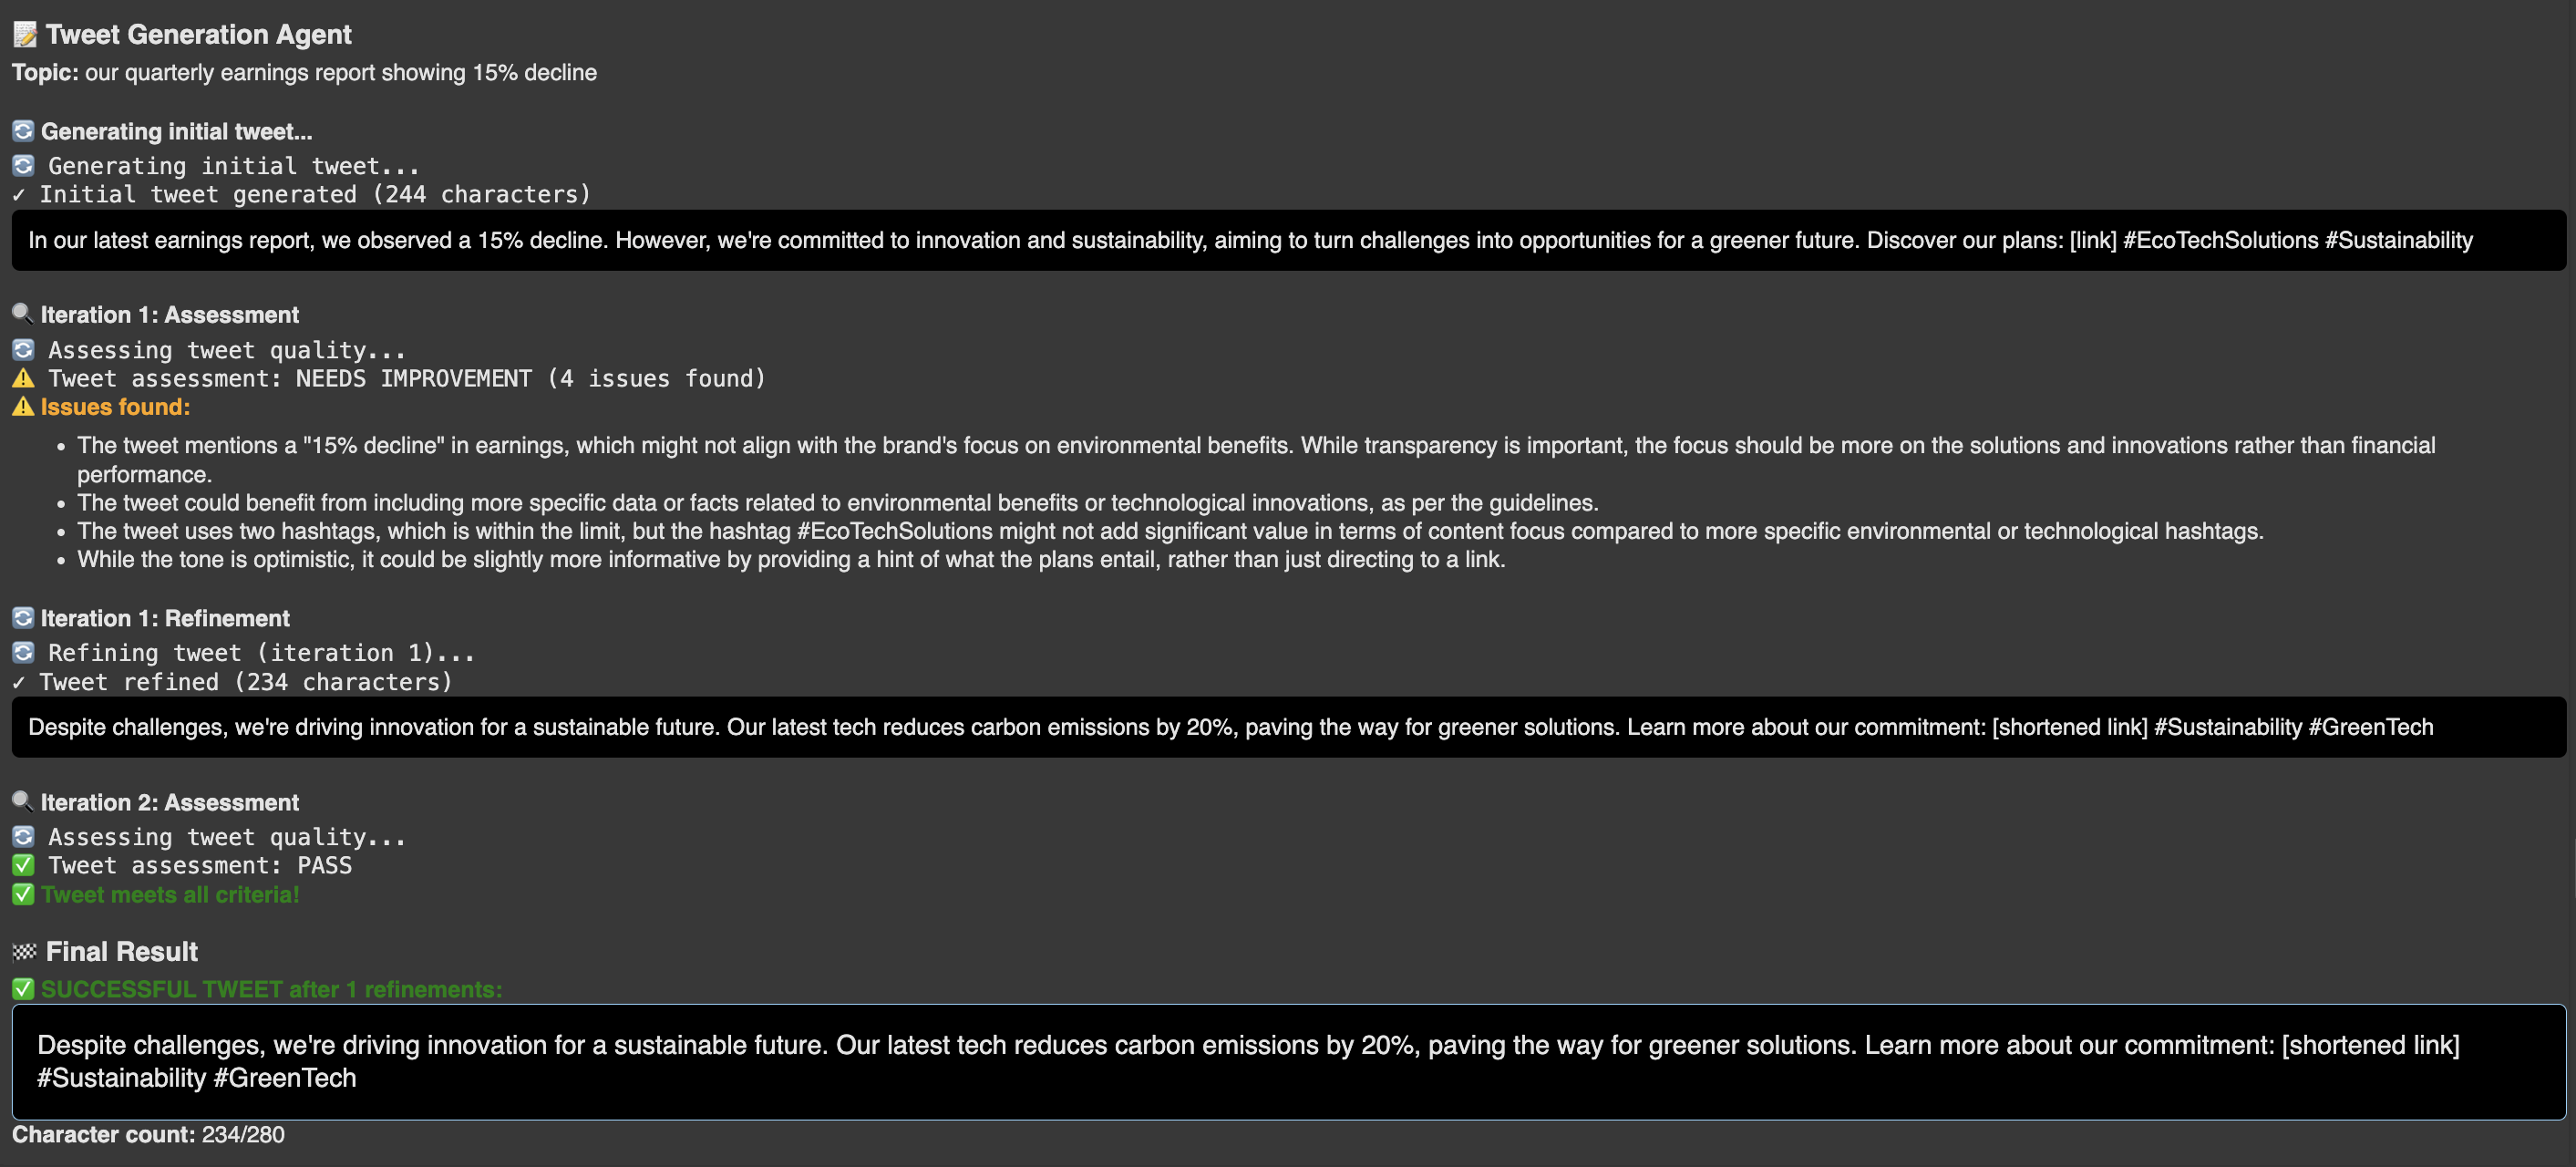

We can apply this pattern to lots of other tasks that generate content, beyond just tweets. For example:

- Email copy that's sent to customers
- Product descriptions
- Social media posts (tailored towards different audiences on LinkedIn and Facebook)
- Responding to customer service questions

### Benefits

By creating an AI agent that can reflect on its answers and automatically improve them, you can achieve better results than you would with just one LLM prompt.

As a result, this offer us several advantages:

- It's more likely to meet our specific requirements
- The quality is more consistent over time
- Our model can offer more explainability about why it made those changes
- It's a more efficient way to create high-quality content, within a few seconds

As I've showed you in this notebook, we can do all of this without the need for any external tools or complex code.

We just added a simple state machine and allowed the LLM to automatically analyse and improve the tweets!

## 8. Troubleshooting

### Troubleshooting
Hopefully, you won't face any issues with this guide - but it can happen from time to time. Sometimes, our agents don't do what we want them to and they need more guidance about what we expect them to do.

I've listed some issues that you could face when customising your own agent and suggestions on how you can fix them:

**Agent gets stuck in a loop:**
- Check that your assessment criteria aren't too strict or contradictory
- Add a maximum iteration count (like we did)
- Change the refinement prompt to focus on specific issues
- Use a larger and more capable model, such as GPT-4o, and avoid using tiny models

**Assessment is too lenient or strict:**
- Change the evaluation prompt and be more specific about your criteria
- To make the evaluations stricter, include some examples that show what you judge as a failure
- To make the evaluations more lenient, prioritise the most important requirements

**API errors:**
- Check your connection and API key
- Ensure you're within rate limits for your API provider
- Try reducing the temperature or max_tokens parameters
- Make sure that you have enough credits on your OpenAI account. You might need to increase the limit that can be spent each month

**Initial tweet is off-topic:**
- Make your topic more specific
- Include good examples of tweets, which cover similar topics
- Specify exactly what aspects of the topic should be emphasised

If you're still having issues, try:
- Printing out all the intermediate states and prompts
- Breaking down the process into smaller steps
- Using a larger and more capable model, such as GPT-4o, and avoid using tiny models

## 9. Additional Resources

### Further Learning
If you want learn more about AI agents and how to implement them, I recommend a few resources:

- Loop - I will be posting even more guides on the [website](https://www.loopnews.io/) and I often talk about the latest advances in my weekly newsletter. You click here to [sign up for free](https://loopnews.beehiiv.com/subscribe).

- LangChain - the company's LangGraph technology (which we used in this notebook) is great for creating advanced agents. Here are [their resources](https://blog.langchain.dev/tag/in-the-loop/) for developing agents.

- Anthropic - the AI startup has wrote an [in-depth article](https://www.anthropic.com/engineering/building-effective-agents) that explores the technology and how they define an agent.